In [1]:
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
import json
import pandas as pd

In [2]:
training = pd.read_csv('warframe_data.csv')
Train=Table.from_df(training)
Train

time,volume,min_price,max_price,avg_price,median_price,warframe,available,ducats,release,hot,date,weekend,realsed_year
2019/1/1,69,56,80,68,70,Banshee,4,260,0,1,1,0,1.9
2019/1/2,74,65,80,72.5,74,Banshee,4,260,0,1,2,0,1.9
2019/1/3,61,61,85,73,75,Banshee,4,260,0,1,3,0,1.9
2019/1/4,50,61,85,73,75,Banshee,4,260,0,1,4,0,1.9
2019/1/5,55,65,80,72.5,73.5,Banshee,4,260,0,1,5,1,1.9
2019/1/6,72,60,80,70,70,Banshee,4,260,0,1,6,1,1.9
2019/1/7,56,65,85,75,75,Banshee,4,260,0,1,7,0,1.9
2019/1/8,59,63,85,74,75,Banshee,4,260,0,1,8,0,1.9
2019/1/9,37,72,80,76,79.5,Banshee,4,260,0,1,9,0,1.9
2019/1/10,38,62,84,73,75,Banshee,4,260,0,1,10,0,1.9


In [3]:
testing = pd.read_csv('Warframe_Test.csv')
Test=Table.from_df(testing)
Test

time,volume,min_price,max_price,avg_price,median_price,warframe,available,ducats,release,hot,date,weekend,released_year
2019/1/19,50,159,180,169.5,170,Ash,2,170,0,1,19,1,3.1
2019/1/20,40,162,185,173.5,175,Ash,2,170,0,1,20,1,3.1
2019/1/21,42,170,190,180,180,Ash,2,170,0,1,21,0,3.1
2019/1/22,40,160,189,174.5,175,Ash,2,170,0,1,22,0,3.1
2019/1/23,48,169,185,177,175,Ash,2,170,0,1,23,0,3.1
2019/1/24,42,170,190,180,180,Ash,2,170,0,1,24,0,3.1
2019/1/25,32,169,190,179.5,180,Ash,2,170,0,1,25,0,3.1
2019/1/26,57,158,180,169,170,Ash,2,170,0,1,26,1,3.1
2019/1/27,56,160,190,175,175,Ash,2,170,0,1,27,1,3.1
2019/1/28,27,165,189,177,178,Ash,2,170,0,1,28,0,3.1


In [4]:
features=[]
for i in range(1335):
    feature1=[]
    feature1.append(Train.row(i)[7])
    feature1.append(Train.row(i)[8]/100)
    feature1.append(Train.row(i)[9])
    feature1.append(Train.row(i)[10])
    feature1.append(Train.row(i)[11]/100)
    feature1.append(Train.row(i)[12])
    feature1.append(Train.row(i)[13])
    features.append(feature1)
features[:5]

[[4, 2.6, 0, 1, 0.01, 0, 1.9],
 [4, 2.6, 0, 1, 0.02, 0, 1.9],
 [4, 2.6, 0, 1, 0.03, 0, 1.9],
 [4, 2.6, 0, 1, 0.04, 0, 1.9],
 [4, 2.6, 0, 1, 0.05, 1, 1.9]]

In [13]:
labels=[]
for i in range(1335):
    label=[]
    #label.append(Train.row(i)[1])
    label.append(Train.row(i)[4])
    labels.append(label)
labels[:5]

[[68.0], [72.5], [73.0], [73.0], [72.5]]

In [6]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression

In [14]:
regr = LinearSVR(random_state=0, tol=1e-5)
features, labels = make_regression(n_features=7, random_state=0)
regr.fit(features, labels)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=1e-05, verbose=0)

In [15]:
print(regr.coef_)

[15.01623891 18.87934993 41.8424198  32.39945294 15.36437429 23.58517821
 26.50178652]


In [16]:
features_test=[]
for i in range(534):
    feature1=[]
    feature1.append(Test.row(i)[7])
    feature1.append(Test.row(i)[8]/100)
    feature1.append(Test.row(i)[9])
    feature1.append(Test.row(i)[10])
    feature1.append(Test.row(i)[11]/100)
    feature1.append(Test.row(i)[12])
    feature1.append(Test.row(i)[13])
    features_test.append(feature1)
features_test[:5]

[[2, 1.7, 0, 1, 0.19, 1, 3.1],
 [2, 1.7, 0, 1, 0.2, 1, 3.1],
 [2, 1.7, 0, 1, 0.21, 0, 3.1],
 [2, 1.7, 0, 1, 0.22, 0, 3.1],
 [2, 1.7, 0, 1, 0.23, 0, 3.1]]

In [17]:
labels_test=[]
for i in range(534):
    label=[]
    #label.append(Test.row(i)[1])
    #label.append(Test.row(i)[2])
    #label.append(Test.row(i)[3])
    label.append(Test.row(i)[4])
    labels_test.append(label)
labels_test[5][0]

180.0

In [18]:
prediction=regr.predict(features_test)

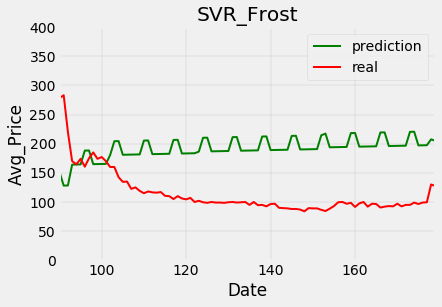

In [21]:
plt.title('SVR_Frost')
plt.xlabel('Date')
plt.ylabel('Avg_Price')

plt.plot(prediction[:500],'g',linewidth = '2',label='prediction')
plt.xlim(90,179)
plt.plot(labels_test[:500],'r',linewidth = '2',label='real')
plt.ylim(0,400)

plt.legend()
plt.grid(True,linestyle = "-",color = 'gray' ,linewidth = '0.15',axis='both')
plt.show()